In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

data = ['/nas_mnt/carruthers/Einar/tsg101_screen/hits_20250108_181547/plate2/results/wells.csv']

settings = {'src':data,
            'graph_name':'hits',
            'data_column':['recruitment'],
            'grouping_column':'pathogen',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.9,1.3],
            'log_y':False,
            'log_x':False,
            'representation':'well',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
import pandas as pd
df = pd.read_csv('/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result/ols/list/regression_data.csv')

def grna_metricks(df):
    df[['plate', 'row', 'column']] = df['prc'].str.split('_', expand=True)

    # --- 2) Compute GRNA-level Well Counts ---
    # For each (grna, plate), count the number of unique prc (wells)
    grna_well_counts = (df.groupby(['grna', 'plate'])['prc'].nunique().reset_index(name='grna_well_count'))

    # --- 3) Compute Gene-level Well Counts ---
    # For each (gene, plate), count the number of unique prc
    gene_well_counts = (df.groupby(['gene', 'plate'])['prc'].nunique().reset_index(name='gene_well_count'))

    # --- 4) Merge These Counts into a Single DataFrame ---
    # Because each grna is typically associated with one gene, we bring them together.
    # First, create a unique (grna, gene, plate) reference from the original df
    unique_triplets = df[['grna', 'gene', 'plate']].drop_duplicates()

    # Merge the grna_well_count
    merged_df = pd.merge(unique_triplets, grna_well_counts, on=['grna', 'plate'], how='left')

    # Merge the gene_well_count
    merged_df = pd.merge(merged_df, gene_well_counts, on=['gene', 'plate'], how='left')

    # Keep only the columns needed (if you want to keep 'gene', remove the drop below)
    final_grna_df = merged_df[['grna', 'plate', 'grna_well_count', 'gene_well_count']]

    # --- 5) Compute gene_count per prc ---
    # For each prc (well), how many distinct genes are there?
    prc_gene_count_df = (df.groupby('prc')['gene'].nunique().reset_index(name='gene_count'))
    prc_gene_count_df[['plate', 'row', 'column']] = prc_gene_count_df['prc'].str.split('_', expand=True)
    
    return final_grna_df, prc_gene_count_df

final_grna_df, prc_gene_count_df = grna_metricks(df)
display(final_grna_df)
display(prc_gene_count_df)


In [ ]:
import pandas as pd

def get_outlier_reference_values(df, outlier_col, return_col):
    """
    Detect outliers in 'outlier_col' of 'df' using the 1.5 × IQR rule,
    and return values from 'return_col' that correspond to those outliers.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input DataFrame.
    outlier_col : str
        Column in which to check for outliers.
    return_col : str
        Column whose values to return for rows that are outliers in 'outlier_col'.
    
    Returns:
    --------
    pd.Series
        A Series containing values from 'return_col' for the outlier rows.
    """
    # Calculate Q1, Q3, and IQR for the outlier_col
    Q1 = df[outlier_col].quantile(0.05)
    Q3 = df[outlier_col].quantile(0.95)
    IQR = Q3 - Q1
    
    # Determine the outlier cutoffs
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a mask for outliers
    outlier_mask = (df[outlier_col] < lower_bound) | (df[outlier_col] > upper_bound)
    
    outliers = df.loc[outlier_mask, return_col]
    
    outliers_ls = outliers.unique().tolist()
    
    return outliers_ls


outliers = get_outlier_reference_values(final_grna_df,outlier_col='grna_well_count',return_col='grna')
display(outliers)

In [ ]:
temp = final_grna_df[final_grna_df['grna_well_count'] >50]
display(temp)

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os
grna_data_path = '/home/carruthers/Desktop/test/final_grna_df.csv'
final_grna_df.to_csv(grna_data_path, index=False)
    
#for plate in df['plate'].unique().tolist():
settings = {'src':grna_data_path,
            'graph_name':'test',
            'data_column':['grna_well_count'],
            'grouping_column':'plate',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[None,None],
            'log_y':False,
            'log_x':False,
            'representation':'object',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

well_data_path = '/home/carruthers/Desktop/test/prc_gene_count_df.csv'
prc_gene_count_df.to_csv(well_data_path, index=False)

display(df)

#for plate in df['plate'].unique().tolist():
settings = {'src':well_data_path,
            'graph_name':'test',
            'data_column':['gene_count'],
            'grouping_column':'plate',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[None,None],
            'log_y':False,
            'log_x':False,
            'representation':'well',
            'verbose':False}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [ ]:
import pandas as pd

res = '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/all_features/results.csv'

df = pd.read_csv(res)

for col in df.columns:
    print(col)

Count data: 172756
Count data: 340110
Count data: 483147
Count data: 642551


,prcfo,cell_area,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_euler_number,cell_channel_0_centroid_weighted-0,cell_channel_0_centroid_weighted-1,cell_channel_0_centroid_weighted_local-0,cell_channel_0_centroid_weighted_local-1,...,similarity_to_neg_chebyshev,similarity_to_pos_braycurtis,similarity_to_neg_braycurtis,prcfo.1,plate,row_name,field,object,prc,plate_name
0,pplate1_r10_c11_f10_o101,47416.0,338.483467,194.152788,0.819138,1.0,1316.751996,841.863085,197.751996,114.863085,...,6.540770e+05,0.425900,0.553982,pplate1_r10_c11_f10_o101,pplate1,r10,f10,o101,pplate1_r10_c11,plate1
1,pplate1_r10_c11_f10_o104,29419.0,237.880277,192.271985,0.588809,1.0,1304.666143,1535.817429,153.666143,65.817429,...,6.076986e+05,0.319323,0.482075,pplate1_r10_c11_f10_o104,pplate1,r10,f10,o104,pplate1_r10_c11,plate1
2,pplate1_r10_c11_f10_o107,39376.0,311.117894,168.003060,0.841666,1.0,1378.350388,1186.782230,165.350388,123.782230,...,6.253943e+05,0.339672,0.486621,pplate1_r10_c11_f10_o107,pplate1,r10,f10,o107,pplate1_r10_c11,plate1
3,pplate1_r10_c11_f10_o137,25455.0,207.929212,182.568742,0.478600,1.0,1433.441398,1626.681374,105.441398,125.681374,...,6.391856e+05,0.377682,0.529607,pplate1_r10_c11_f10_o137,pplate1,r10,f10,o137,pplate1_r10_c11,plate1
4,pplate1_r10_c11_f10_o138,14935.0,163.287870,117.297634,0.695683,1.0,1445.107938,1740.557630,100.107938,55.557630,...,6.246202e+05,0.369765,0.531419,pplate1_r10_c11_f10_o138,pplate1,r10,f10,o138,pplate1_r10_c11,plate1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54612,pplate1_r9_c9_f9_o4,119711.0,655.896163,313.252089,0.878581,-3.0,253.060893,1308.217976,253.060893,233.217976,...,4.760795e+05,0.233685,0.380233,pplate1_r9_c9_f9_o4,pplate1,r9,f9,o4,pplate1_r9_c9,plate1
54613,pplate1_r9_c9_f9_o73,31510.0,214.262218,194.380973,0.420677,1.0,940.148803,459.757433,148.148803,108.757433,...,1.186912e+06,0.576825,0.409601,pplate1_r9_c9_f9_o73,pplate1,r9,f9,o73,pplate1_r9_c9,plate1
54614,pplate1_r9_c9_f9_o75,25766.0,264.952876,139.403918,0.850394,1.0,909.027063,95.725831,98.027063,95.725831,...,5.535424e+05,0.357914,0.496888,pplate1_r9_c9_f9_o75,pplate1,r9,f9,o75,pplate1_r9_c9,plate1
54615,pplate1_r9_c9_f9_o79,31541.0,240.221682,179.891833,0.662731,1.0,1102.459058,1634.354355,139.459058,103.354355,...,6.477285e+05,0.419846,0.561885,pplate1_r9_c9_f9_o79,pplate1,r9,f9,o79,pplate1_r9_c9,plate1


Score data: 54617


,prcfo,cell_area,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_euler_number,cell_channel_0_centroid_weighted-0,cell_channel_0_centroid_weighted-1,cell_channel_0_centroid_weighted_local-0,cell_channel_0_centroid_weighted_local-1,...,cell_equivalent_diameter_area,cell_channel_1_percentile_5,cytoplasm_channel_0_percentile_25,nucleus_channel_1_percentile_25,nucleus_channel_2_outside_25_percentile,nucleus_channel_3_percentile_5,pathogen_channel_0_periphery_25_percentile,pathogen_channel_1_percentile_75,pathogen_channel_1_outside_75_percentile,pathogen_channel_2_outside_85_percentile
0,pplate1_r10_c11_f10_o101,47416.0,338.483467,194.152788,0.819138,1.0,1316.751996,841.863085,197.751996,114.863085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pplate1_r10_c11_f10_o104,29419.0,237.880277,192.271985,0.588809,1.0,1304.666143,1535.817429,153.666143,65.817429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pplate1_r10_c11_f10_o107,39376.0,311.117894,168.003060,0.841666,1.0,1378.350388,1186.782230,165.350388,123.782230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pplate1_r10_c11_f10_o137,25455.0,207.929212,182.568742,0.478600,1.0,1433.441398,1626.681374,105.441398,125.681374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pplate1_r10_c11_f10_o138,14935.0,163.287870,117.297634,0.695683,1.0,1445.107938,1740.557630,100.107938,55.557630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53222,pplate2_r9_c9_f8_o48,27654.0,246.055870,146.571098,0.803220,1.0,827.750449,325.681257,154.750449,96.681257,...,187.643722,0.0,0.0,141.5,30.5,0.0,696.00,561.666667,675.833333,1971.566667
53223,pplate2_r9_c9_f8_o51,22326.0,238.453428,123.606249,0.855159,1.0,826.586093,499.406337,104.586093,92.406337,...,168.601145,0.0,0.0,0.0,45.0,0.0,639.00,599.000000,712.000000,251.000000
53224,pplate2_r9_c9_f8_o82,28260.0,242.797934,161.075148,0.748254,1.0,1661.322296,223.234537,150.322296,86.234537,...,189.688559,0.0,0.0,0.0,17.0,0.0,604.00,612.000000,705.500000,288.500000
53225,pplate2_r9_c9_f8_o84,27669.0,237.435517,151.614477,0.769580,1.0,1728.256007,1398.237141,133.256007,90.237141,...,187.694606,0.0,0.0,172.0,19.0,0.0,548.00,455.000000,491.000000,309.050000


Score data: 107844


,prcfo,cell_area,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_euler_number,cell_channel_0_centroid_weighted-0,cell_channel_0_centroid_weighted-1,cell_channel_0_centroid_weighted_local-0,cell_channel_0_centroid_weighted_local-1,...,nucleus_channel_3_percentile_10,nucleus_channel_0_channel_1_Pearson_correlation,nucleus_channel_0_channel_2_Pearson_correlation,nucleus_channel_0_channel_3_Pearson_correlation,nucleus_channel_1_channel_2_Pearson_correlation,nucleus_channel_1_channel_3_Pearson_correlation,nucleus_channel_2_channel_3_Pearson_correlation,pathogen_channel_1_periphery_85_percentile,pathogen_channel_1_outside_85_percentile,pathogen_channel_2_periphery_25_percentile
0,pplate1_r10_c11_f10_o101,47416.0,338.483467,194.152788,0.819138,1.0,1316.751996,841.863085,197.751996,114.863085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pplate1_r10_c11_f10_o104,29419.0,237.880277,192.271985,0.588809,1.0,1304.666143,1535.817429,153.666143,65.817429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pplate1_r10_c11_f10_o107,39376.0,311.117894,168.003060,0.841666,1.0,1378.350388,1186.782230,165.350388,123.782230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pplate1_r10_c11_f10_o137,25455.0,207.929212,182.568742,0.478600,1.0,1433.441398,1626.681374,105.441398,125.681374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pplate1_r10_c11_f10_o138,14935.0,163.287870,117.297634,0.695683,1.0,1445.107938,1740.557630,100.107938,55.557630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51490,pplate3_r9_c9_f9_o25,19582.0,171.158906,151.385221,0.466594,1.0,377.662027,1747.917446,94.662027,85.917446,...,0.0,-0.197402,-0.128615,0.015155,0.158863,-0.029802,-0.339070,459.850,482.250,293.125
51491,pplate3_r9_c9_f9_o34,33183.0,268.031571,165.399975,0.786891,1.0,519.509660,982.340000,99.509660,122.340000,...,0.0,-0.281603,-0.121020,-0.081917,0.106654,0.029466,0.120962,500.250,527.000,200.500
51492,pplate3_r9_c9_f9_o38,26874.0,212.155491,165.936643,0.623095,1.0,634.072836,131.903630,105.072836,89.903630,...,0.0,-0.169762,-0.267236,-0.053513,0.378616,0.269638,0.252737,653.175,630.500,251.375
51493,pplate3_r9_c9_f9_o40,30526.0,236.550849,174.657600,0.674416,1.0,701.962469,424.115424,154.962469,91.115424,...,0.0,-0.321079,-0.058117,-0.049696,0.209866,0.205588,0.080517,750.200,729.000,338.000


Score data: 159339


,prcfo,cell_area,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_euler_number,cell_channel_0_centroid_weighted-0,cell_channel_0_centroid_weighted-1,cell_channel_0_centroid_weighted_local-0,cell_channel_0_centroid_weighted_local-1,...,pathogen_channel_1_periphery_85_percentile,pathogen_channel_1_outside_85_percentile,pathogen_channel_2_periphery_25_percentile,pathogen_channel_2_percentile_10,pathogen_channel_0_channel_1_Pearson_correlation,pathogen_channel_0_channel_2_Pearson_correlation,pathogen_channel_0_channel_3_Pearson_correlation,pathogen_channel_1_channel_2_Pearson_correlation,pathogen_channel_1_channel_3_Pearson_correlation,pathogen_channel_2_channel_3_Pearson_correlation
0,pplate1_r10_c11_f10_o101,47416.0,338.483467,194.152788,0.819138,1.0,1316.751996,841.863085,197.751996,114.863085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pplate1_r10_c11_f10_o104,29419.0,237.880277,192.271985,0.588809,1.0,1304.666143,1535.817429,153.666143,65.817429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pplate1_r10_c11_f10_o107,39376.0,311.117894,168.003060,0.841666,1.0,1378.350388,1186.782230,165.350388,123.782230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pplate1_r10_c11_f10_o137,25455.0,207.929212,182.568742,0.478600,1.0,1433.441398,1626.681374,105.441398,125.681374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pplate1_r10_c11_f10_o138,14935.0,163.287870,117.297634,0.695683,1.0,1445.107938,1740.557630,100.107938,55.557630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45266,pplate4_r9_c9_f9_o60,24756.0,194.322943,164.038124,0.536104,1.0,1373.789005,459.663726,100.789005,94.663726,...,NaN,NaN,310.000000,0.0,-0.177277,-0.331968,0.084027,0.165441,-0.336291,0.047667
45267,pplate4_r9_c9_f9_o68,52674.0,299.291141,237.251479,0.609597,1.0,1899.321153,1090.427920,174.321153,122.427920,...,NaN,NaN,310.875000,0.0,-0.272702,-0.236844,0.464383,0.382608,-0.218479,-0.163587
45268,pplate4_r9_c9_f9_o69,14272.0,164.507167,111.302917,0.736365,1.0,1826.605986,107.571924,74.605986,63.571924,...,NaN,NaN,306.000000,0.0,-0.230831,0.126769,0.300803,-0.026968,-0.273743,0.182424
45269,pplate4_r9_c9_f9_o73,23425.0,208.224604,145.979305,0.713096,1.0,1944.907906,230.119048,109.907906,101.119048,...,NaN,NaN,236.750000,0.0,-0.416968,-0.008653,0.252261,0.181235,-0.277974,-0.345933


Score data: 204610


,Key,Value
0,count_data,[/nas_mnt/carruthers/Einar/tsg101_screen/seque...
1,score_data,[/nas_mnt/carruthers/Einar/tsg101_screen/TSG10...
2,metadata_files,[/home/carruthers/Documents/TGME49_Summary.csv...
3,positive_control,239740
4,negative_control,233460
5,min_n,3
6,fraction_threshold,None
7,target_unique_count,5
8,tolerance,5
9,log_x,False


Dependent variable after clean_controls: 204610
Saved /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/cell_min_threshold.pdf


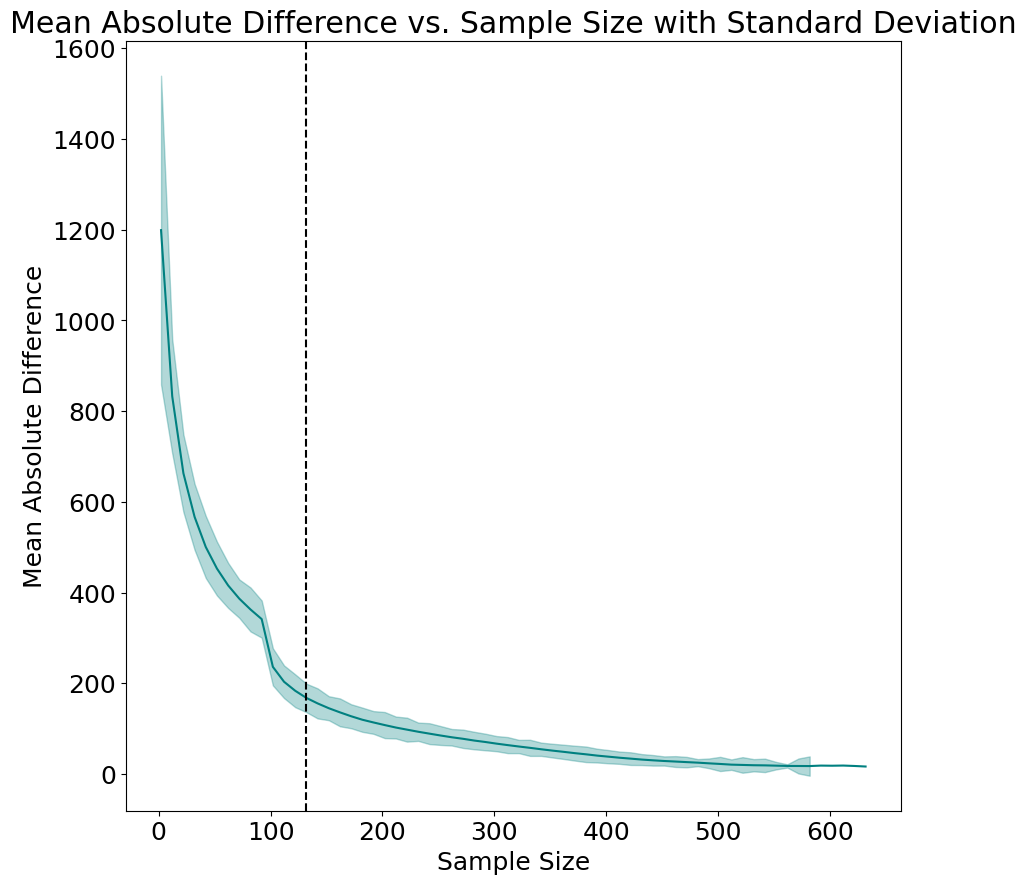

Minimum cell count: 132.0
Dependent variable after minimum cell count filter: 204610


,prcfo,cell_area,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_euler_number,cell_channel_0_centroid_weighted-0,cell_channel_0_centroid_weighted-1,cell_channel_0_centroid_weighted_local-0,cell_channel_0_centroid_weighted_local-1,...,pathogen_channel_1_periphery_85_percentile,pathogen_channel_1_outside_85_percentile,pathogen_channel_2_periphery_25_percentile,pathogen_channel_2_percentile_10,pathogen_channel_0_channel_1_Pearson_correlation,pathogen_channel_0_channel_2_Pearson_correlation,pathogen_channel_0_channel_3_Pearson_correlation,pathogen_channel_1_channel_2_Pearson_correlation,pathogen_channel_1_channel_3_Pearson_correlation,pathogen_channel_2_channel_3_Pearson_correlation
0,pplate1_r10_c11_f10_o101,47416.0,338.483467,194.152788,0.819138,1.0,1316.751996,841.863085,197.751996,114.863085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pplate1_r10_c11_f10_o104,29419.0,237.880277,192.271985,0.588809,1.0,1304.666143,1535.817429,153.666143,65.817429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pplate1_r10_c11_f10_o107,39376.0,311.117894,168.003060,0.841666,1.0,1378.350388,1186.782230,165.350388,123.782230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pplate1_r10_c11_f10_o137,25455.0,207.929212,182.568742,0.478600,1.0,1433.441398,1626.681374,105.441398,125.681374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pplate1_r10_c11_f10_o138,14935.0,163.287870,117.297634,0.695683,1.0,1445.107938,1740.557630,100.107938,55.557630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45266,pplate4_r9_c9_f9_o60,24756.0,194.322943,164.038124,0.536104,1.0,1373.789005,459.663726,100.789005,94.663726,...,NaN,NaN,310.000000,0.0,-0.177277,-0.331968,0.084027,0.165441,-0.336291,0.047667
45267,pplate4_r9_c9_f9_o68,52674.0,299.291141,237.251479,0.609597,1.0,1899.321153,1090.427920,174.321153,122.427920,...,NaN,NaN,310.875000,0.0,-0.272702,-0.236844,0.464383,0.382608,-0.218479,-0.163587
45268,pplate4_r9_c9_f9_o69,14272.0,164.507167,111.302917,0.736365,1.0,1826.605986,107.571924,74.605986,63.571924,...,NaN,NaN,306.000000,0.0,-0.230831,0.126769,0.300803,-0.026968,-0.273743,0.182424
45269,pplate4_r9_c9_f9_o73,23425.0,208.224604,145.979305,0.713096,1.0,1944.907906,230.119048,109.907906,101.119048,...,NaN,NaN,236.750000,0.0,-0.416968,-0.008653,0.252261,0.181235,-0.277974,-0.345933


Using agg_type: mean
log_pathogen_area is not normally distributed
Dependent variable after process_scores: 613


,prc,pathogen_area,cell_count,log_pathogen_area
0,plate1_r10_c1,2964.801090,367,7.994902
1,plate1_r10_c11,2516.114286,140,7.830868
4,plate1_r10_c14,2322.654167,240,7.750896
6,plate1_r10_c16,2614.320000,200,7.869142
7,plate1_r10_c17,2528.074074,162,7.835609
...,...,...,...,...
1357,plate4_r9_c22,2265.718519,135,7.726088
1359,plate4_r9_c24,2467.416342,257,7.811332
1360,plate4_r9_c3,3168.365239,397,8.061287
1363,plate4_r9_c7,2454.892086,139,7.806245


Closest Fraction Threshold: 0.01683983983983984
Unique Count at Threshold: 4.991815476190476
Saved /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/fraction_threshold.pdf


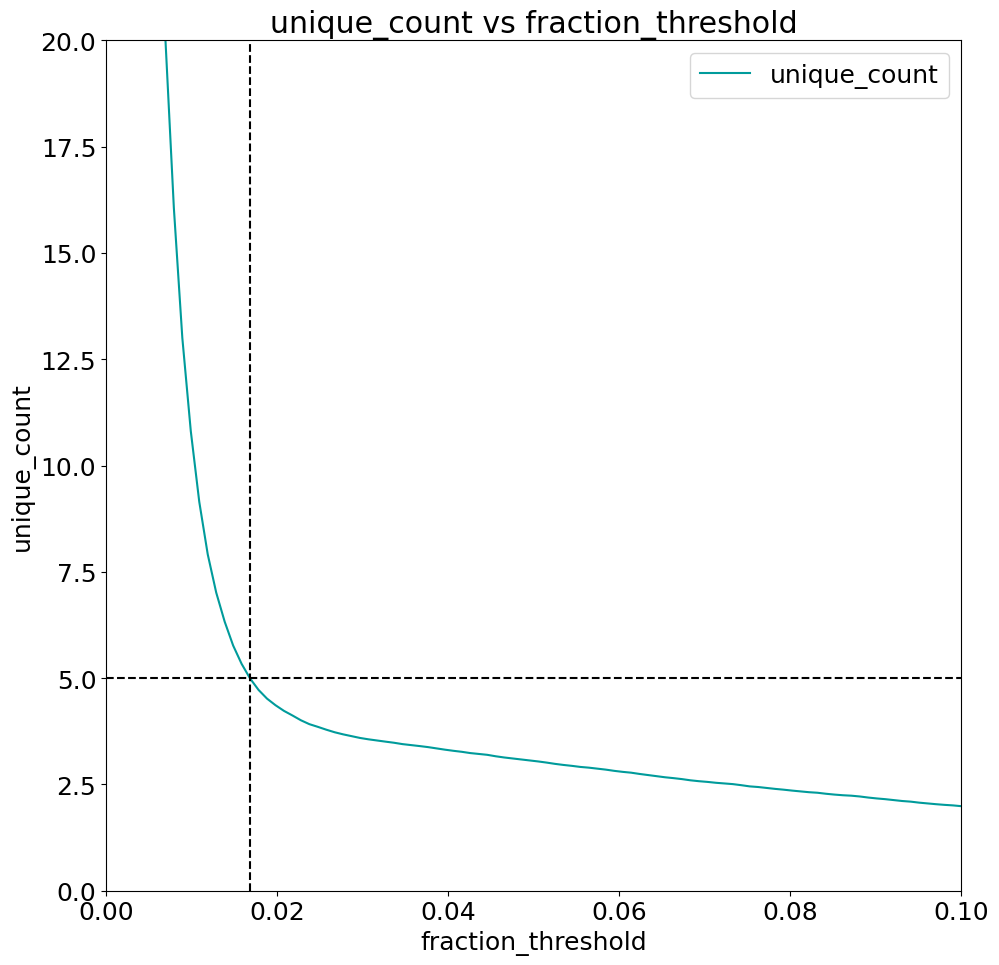

unique_count mean: 4.991815476190476 std: 2.563113968760724
Saved heatmap to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/plate_heatmap_22.pdf


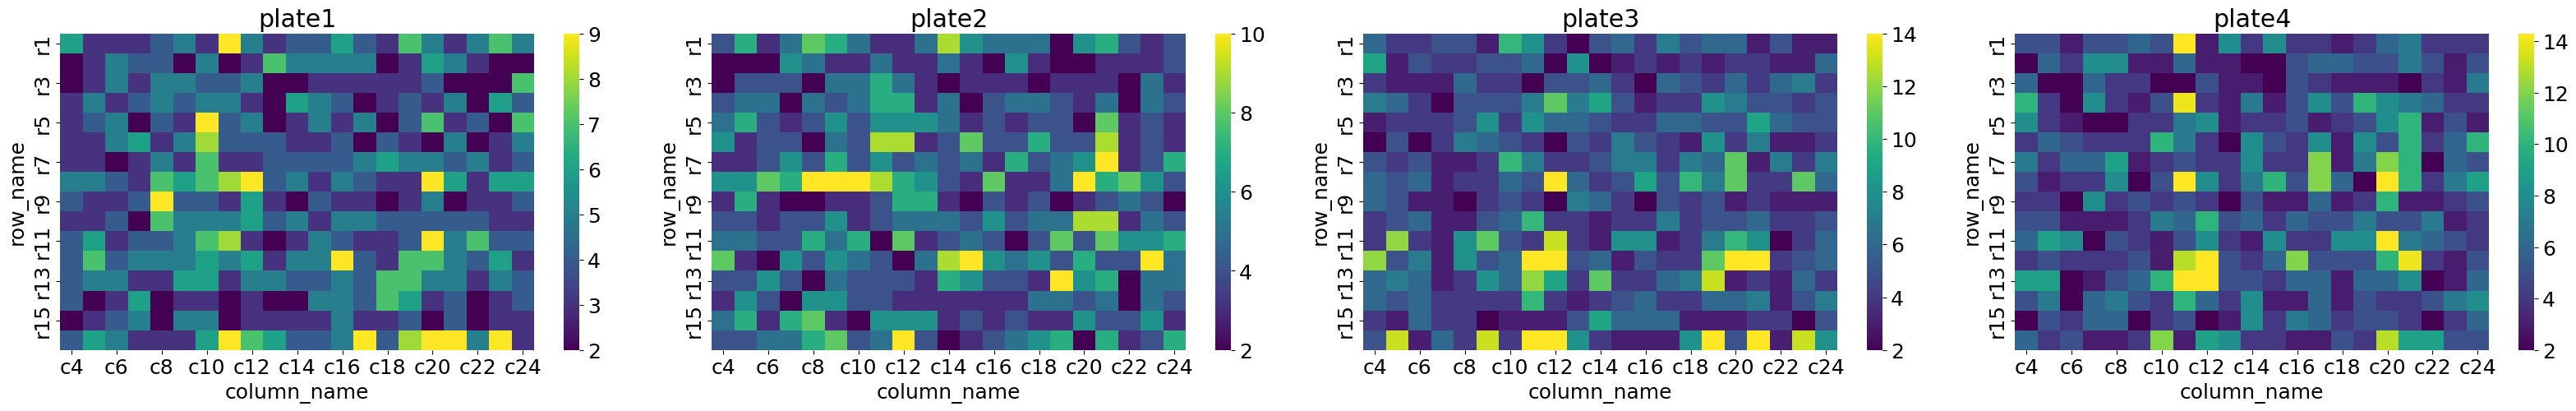

Removed 579329 observation below fraction threshold: 0.01683983983983984
Independent variable after process_reads: 6709


,prc,grna,fraction,gene
98,plate1_r1_c10,220950_1,0.226064,220950
146,plate1_r1_c10,232020_2,0.096526,232020
148,plate1_r1_c10,233460_4,0.104772,233460
559,plate1_r1_c11,205250_2,0.017614,205250
617,plate1_r1_c11,220950_1,0.247424,220950
...,...,...,...,...
585749,plate4_r9_c9,220950_1,0.102034,220950
585781,plate4_r9_c9,233460_4,0.023829,233460
585783,plate4_r9_c9,233695_2,0.245919,233695
585925,plate4_r9_c9,280380_3,0.170810,280380


,prc,pathogen_area,cell_count,log_pathogen_area
0,plate1_r10_c1,2964.801090,367,7.994902
1,plate1_r10_c11,2516.114286,140,7.830868
4,plate1_r10_c14,2322.654167,240,7.750896
6,plate1_r10_c16,2614.320000,200,7.869142
7,plate1_r10_c17,2528.074074,162,7.835609
...,...,...,...,...
1357,plate4_r9_c22,2265.718519,135,7.726088
1359,plate4_r9_c24,2467.416342,257,7.811332
1360,plate4_r9_c3,3168.365239,397,8.061287
1363,plate4_r9_c7,2454.892086,139,7.806245


,prc,grna,fraction,gene,pathogen_area,cell_count,log_pathogen_area
0,plate1_r1_c12,000000_29,0.194304,000000,2102.503497,143,7.651360
1,plate1_r1_c12,220950_1,0.026597,220950,2102.503497,143,7.651360
2,plate1_r1_c12,250360_2,0.024508,250360,2102.503497,143,7.651360
3,plate1_r1_c12,262920_2,0.193054,262920,2102.503497,143,7.651360
4,plate1_r1_c12,411330_14,0.489847,411330,2102.503497,143,7.651360
...,...,...,...,...,...,...,...
2195,plate4_r9_c9,220950_1,0.102034,220950,2480.865772,149,7.816766
2196,plate4_r9_c9,233460_4,0.023829,233460,2480.865772,149,7.816766
2197,plate4_r9_c9,233695_2,0.245919,233695,2480.865772,149,7.816766
2198,plate4_r9_c9,280380_3,0.170810,280380,2480.865772,149,7.816766


Saved regression data to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/regression_data.csv


,prc,grna,fraction,gene,pathogen_area,cell_count,log_pathogen_area,plate,row_name,column,column_name
0,plate1_r1_c12,000000_29,0.194304,000000,2102.503497,143,7.651360,plate1,r1,c12,c12
1,plate1_r1_c12,220950_1,0.026597,220950,2102.503497,143,7.651360,plate1,r1,c12,c12
2,plate1_r1_c12,250360_2,0.024508,250360,2102.503497,143,7.651360,plate1,r1,c12,c12
3,plate1_r1_c12,262920_2,0.193054,262920,2102.503497,143,7.651360,plate1,r1,c12,c12
4,plate1_r1_c12,411330_14,0.489847,411330,2102.503497,143,7.651360,plate1,r1,c12,c12
...,...,...,...,...,...,...,...,...,...,...,...
2195,plate4_r9_c9,220950_1,0.102034,220950,2480.865772,149,7.816766,plate4,r9,c9,c9
2196,plate4_r9_c9,233460_4,0.023829,233460,2480.865772,149,7.816766,plate4,r9,c9,c9
2197,plate4_r9_c9,233695_2,0.245919,233695,2480.865772,149,7.816766,plate4,r9,c9,c9
2198,plate4_r9_c9,280380_3,0.170810,280380,2480.865772,149,7.816766,plate4,r9,c9,c9


performing_dunns
Plot saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/results/cell_count/cell_count_cell_count_plate_jitter_bar.pdf
Test results saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/results/cell_count/cell_count_cell_count_plate_jitter_bar.csv


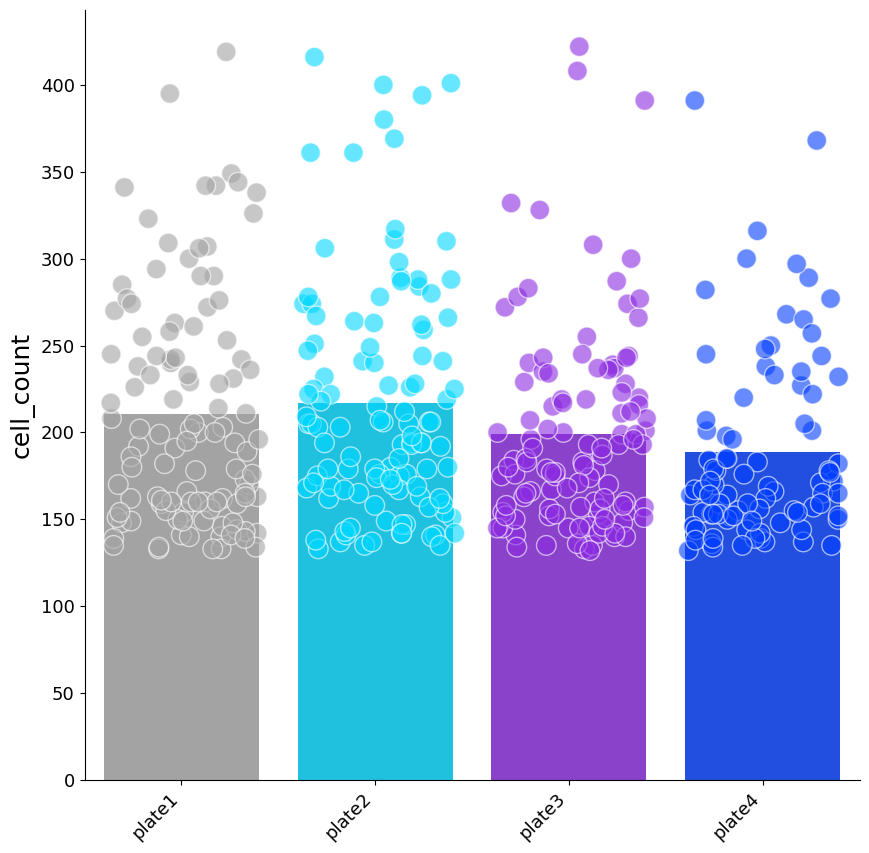

Saved regression data to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/regression_data.csv
Saved grna per well data to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/grna_well.csv


,grna,plate,grna_well_count,gene_well_count
0,000000_29,plate1,1,10
1,250360_2,plate1,1,1
2,262920_2,plate1,1,1
3,411330_14,plate1,1,3
4,217530_3,plate1,1,1
...,...,...,...,...
1105,203310_3,plate4,1,1
1106,276210_2,plate4,1,1
1107,411850_126,plate4,1,4
1108,233695_2,plate4,1,1


performing_dunns
Plot saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/results/wells_per_gene/wells_per_gene_grna_well_count_plate_jitter_bar.pdf
Test results saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/results/wells_per_gene/wells_per_gene_grna_well_count_plate_jitter_bar.csv


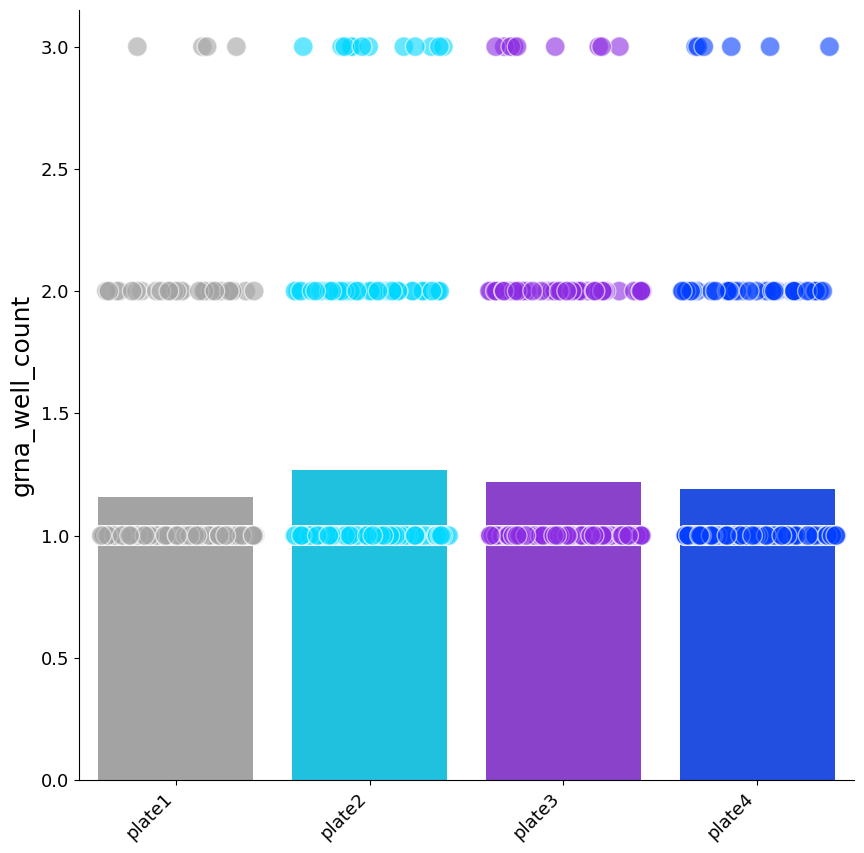

Saved well per grna data to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/well_grna.csv


,prc,gene_count,plate,row,column,row_name,column_name
0,plate1_r10_c11,3,plate1,r10,c11,r10,c11
1,plate1_r10_c14,3,plate1,r10,c14,r10,c14
2,plate1_r10_c16,3,plate1,r10,c16,r10,c16
3,plate1_r10_c17,3,plate1,r10,c17,r10,c17
4,plate1_r10_c8,5,plate1,r10,c8,r10,c8
...,...,...,...,...,...,...,...
410,plate4_r9_c20,7,plate4,r9,c20,r9,c20
411,plate4_r9_c22,1,plate4,r9,c22,r9,c22
412,plate4_r9_c24,3,plate4,r9,c24,r9,c24
413,plate4_r9_c7,5,plate4,r9,c7,r9,c7


performing_dunns
Plot saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/results/gene_per_well/gene_per_well_gene_count_plate_jitter_bar.pdf
Test results saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/results/gene_per_well/gene_per_well_gene_count_plate_jitter_bar.csv


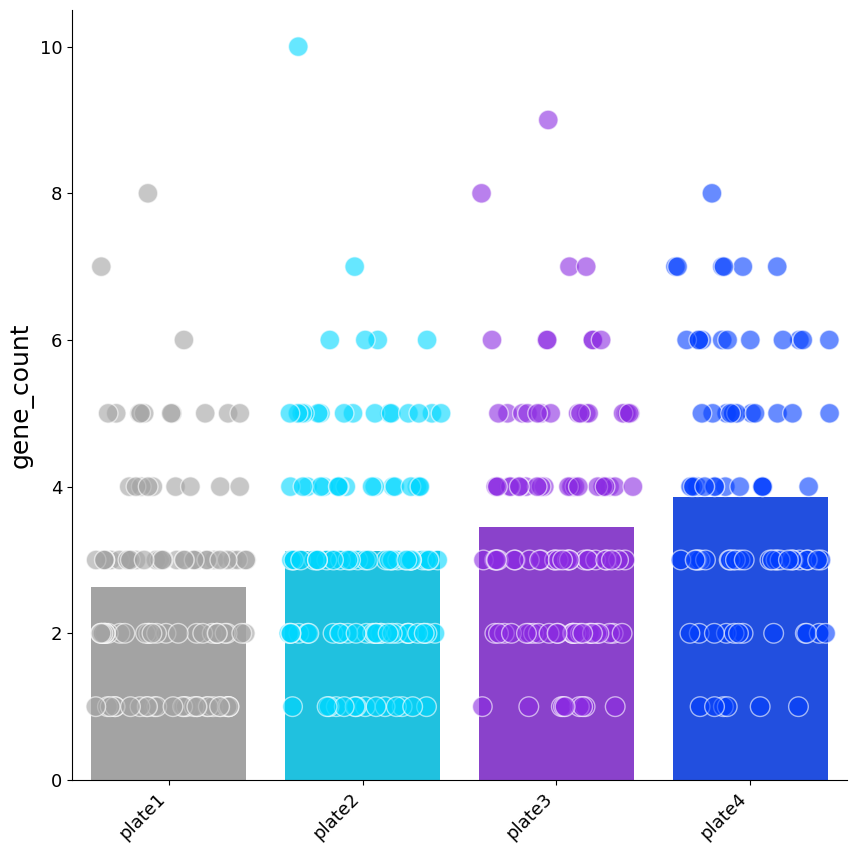

Saved heatmap to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/plate_heatmap_1.pdf


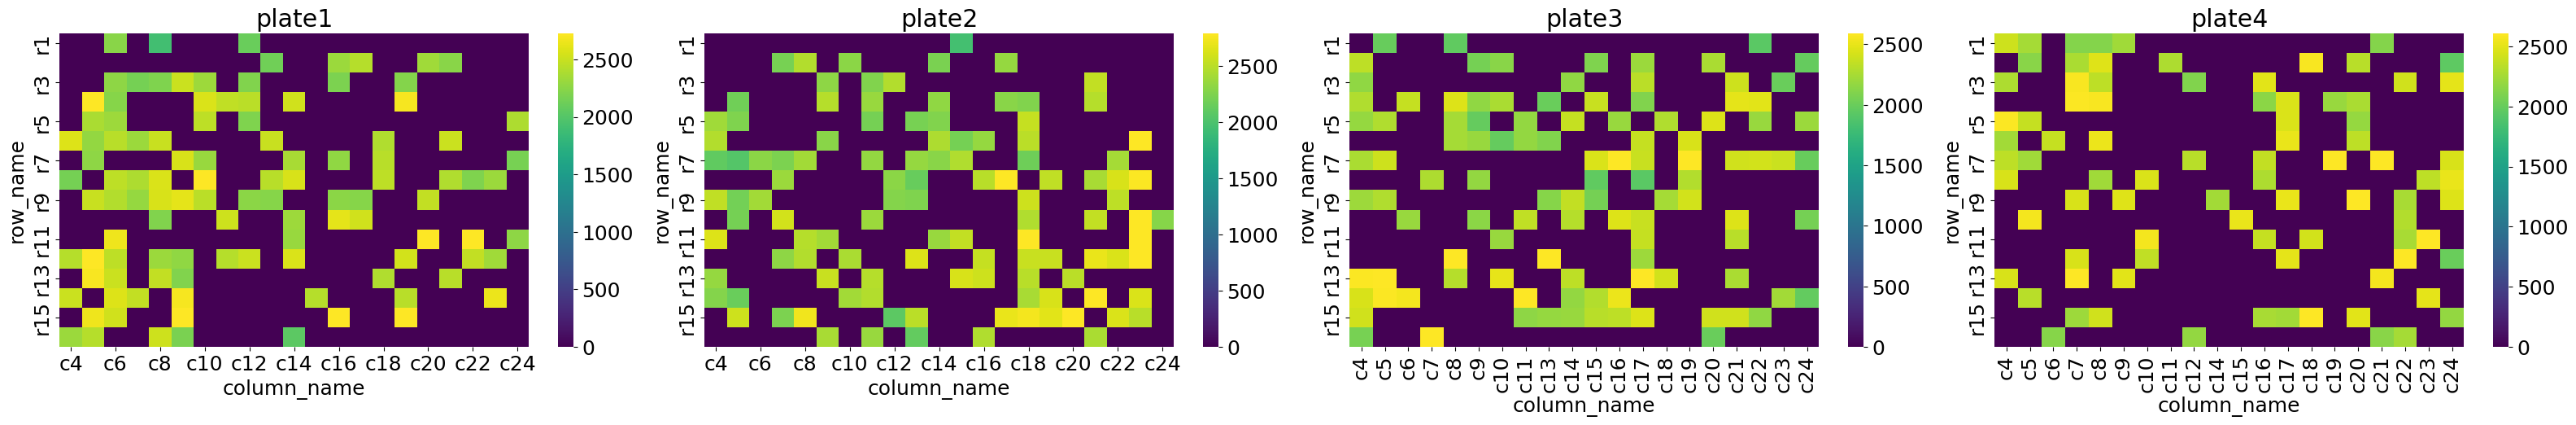

Using regression type: ols
Missing values summary:
fraction             0
log_pathogen_area    0
dtype: int64
Converted grna to categorical type.
Converted gene to categorical type.
Converted plate to categorical type.
Converted row_name to categorical type.
Converted column_name to categorical type.
Converted prc to categorical type.
Checking for collinearity...
Variance Inflation Factor (VIF) for each feature:
             Feature       VIF
0           fraction  2.451038
1  log_pathogen_area  2.451038
Data is ready for model fitting.
Saved histogram to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/log_pathogen_area_histogram.pdf


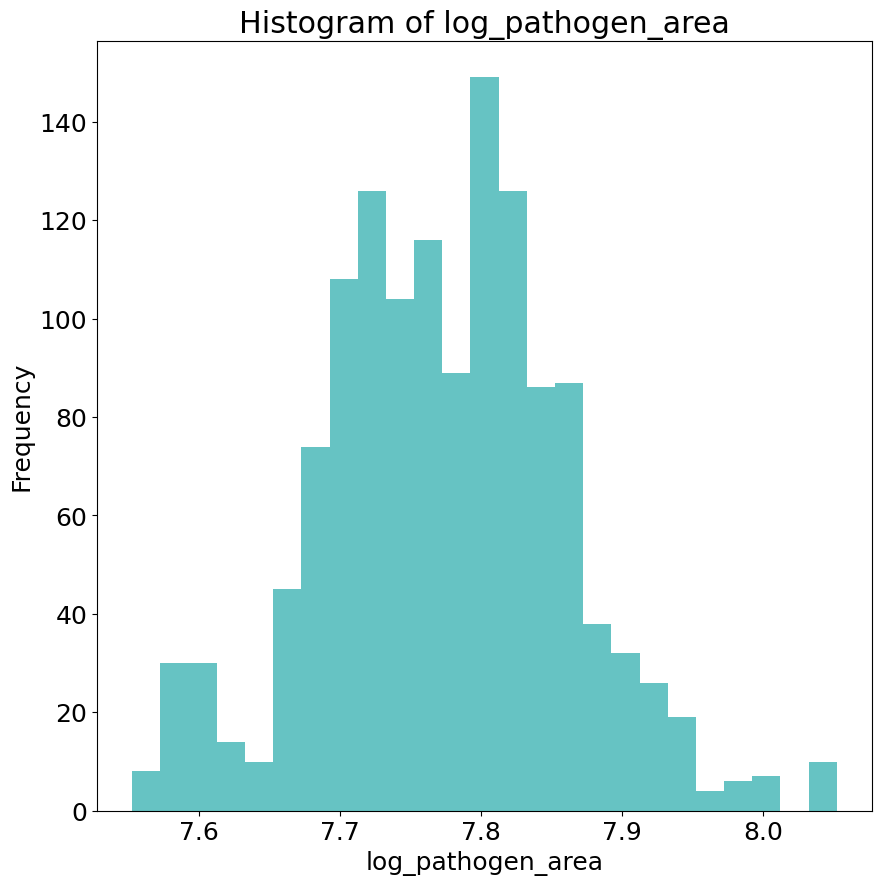

Saved histogram to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/fraction_histogram.pdf


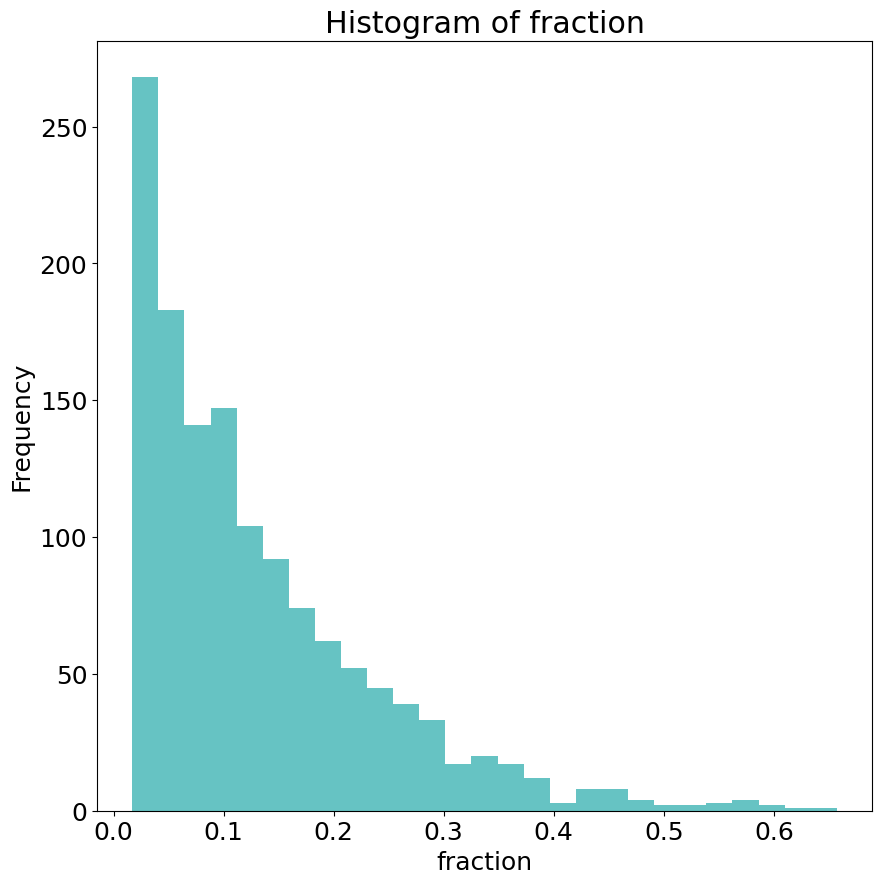

Performing ols regression


,feature,coefficient,p_value,-log10(p_value),grna,condition
0,Intercept,1.190965e-15,0.267155,0.573237,NaN,other
36,fraction:grna[000000_10],9.883979e-01,0.012621,1.898901,000000_10,control
37,fraction:grna[000000_11],4.087059e-01,0.032610,1.486643,000000_11,control
38,fraction:grna[000000_12],9.370446e-01,0.009219,2.035326,000000_12,control
39,fraction:grna[000000_13],1.307283e+00,0.018491,1.733046,000000_13,control
...,...,...,...,...,...,...
1083,gene_fraction:gene[411470],-5.743672e-02,0.433120,0.363391,411470,other
1084,gene_fraction:gene[411590],5.898245e-02,0.304363,0.516607,411590,other
1085,gene_fraction:gene[411640],2.985338e-02,0.673508,0.171658,411640,other
1086,gene_fraction:gene[411710],-3.382826e-02,0.594957,0.225514,411710,other


0.6445200280821191 0.7626435144470542
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              18.28
Date:                Thu, 06 Feb 2025   Prob (F-statistic):                   6.76e-225
Time:                        11:44:34   Log-Likelihood:                          1193.2
No. Observations:                1344   AIC:                                     -926.4
Df Residuals:                     614   BIC:                                      2872.
Df Model:                         730                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.02

gene


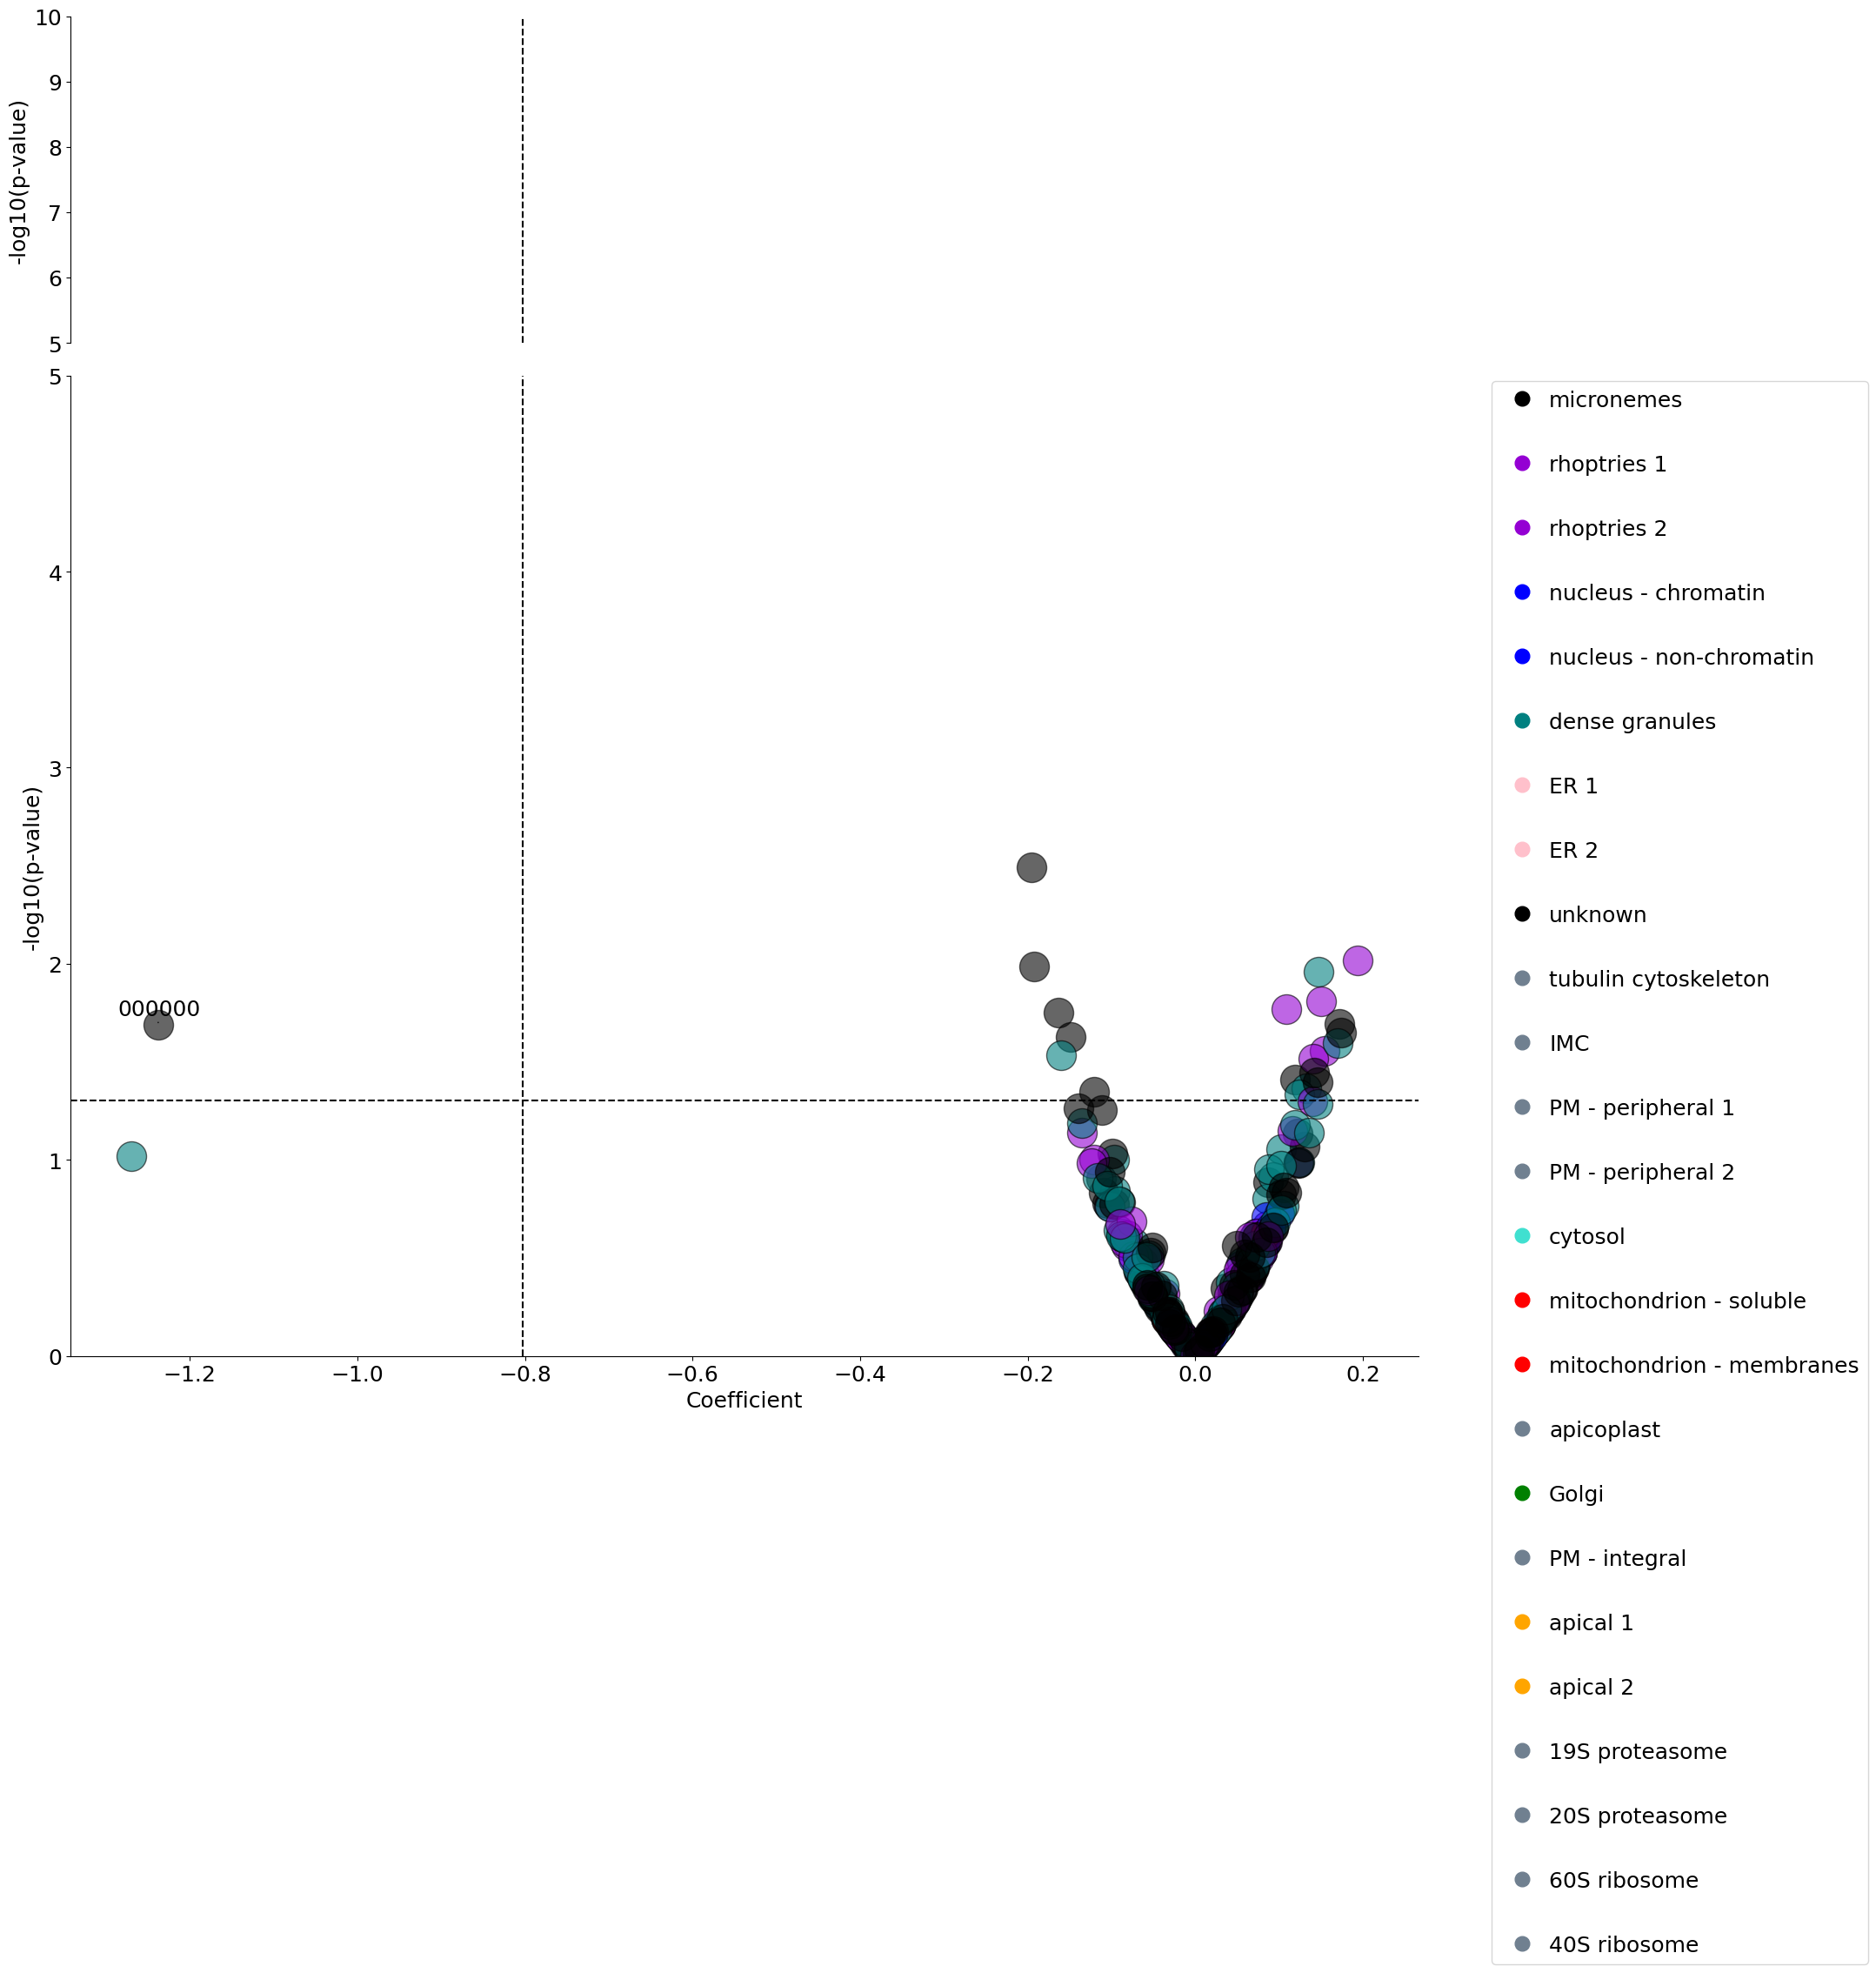

['000000']

Plotting gene phenotypes and heatmaps
['000000']
Figure saved to /nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/results/ols/list/phenotype_plot.pdf


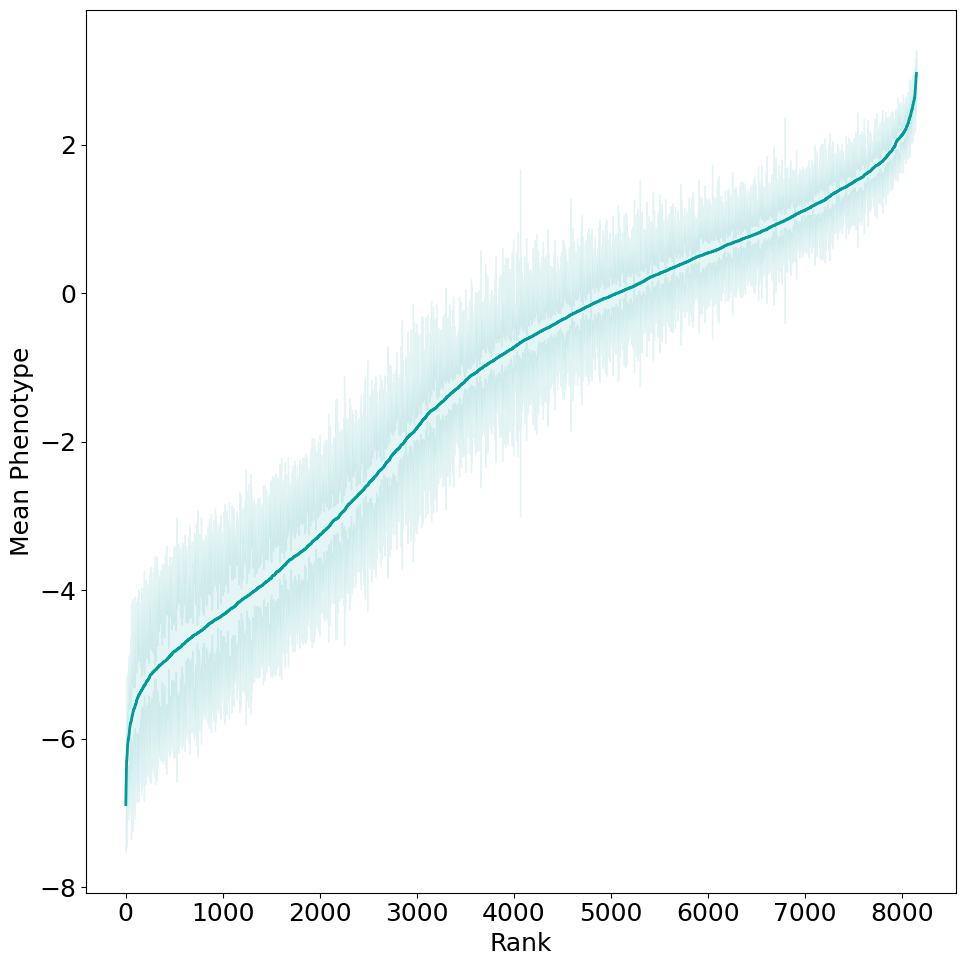

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 2800x100 with 0 Axes>

In [4]:
#Figure 3c
from spacr.ml import perform_regression
import pandas as pd
%matplotlib inline

count_data = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
            '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']

#score_data_dl = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/channel_1/results.csv',
#                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost/channel_1/results.csv',
#                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost/channel_1/results.csv',
#                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost/channel_1/results.csv']

score_data_dl = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/all_features/results.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost/all_features/results.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost/all_features/results.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost/all_features/results.csv']

# 'cytoplasm_channel_2_percentile_75' 'pathogen_area'

settings = {'count_data':count_data,
            'score_data':score_data_dl,
            'metadata_files':['/home/carruthers/Documents/TGME49_Summary.csv','/home/carruthers/Documents/TGGT1_Summary.csv'],
            'positive_control':'239740',
            'negative_control':'233460',
            'min_n':3,
            'fraction_threshold':None,
            'target_unique_count':5,
            'tolerance':5,
            'log_x':False,
            'log_y':False,
            'x_lim':None,
            'outlier_detection':True,
            'control_wells':['c1','c2','c3'],
            'filter_column':'column',
            'dependent_variable': 'pathogen_area',
            'threshold_method':'var',
            'threshold_multiplier':2,
            'transform':'log',
            'agg_type':'mean',
            'score_column':'pathogen_area',
            'min_cell_count':None,
            'regression_type':'ols',
            'random_row_column_effects':False,
            'y_lims':[[0,5], [5, 10]],
            'plate':None,
            'cov_type':None,
            'volcano':'gene',
            'alpha':0.8}

output = perform_regression(settings)

In [ ]:
dvs = ['pathogen_nucleus_shortest_distance','pathogen_area', 'cell_area']
for dv in dvs:
    settings = {'count_data':count_data,
                'score_data':score_data_dl,
                'metadata_files':['/home/carruthers/Documents/TGME49_Summary.csv','/home/carruthers/Documents/TGGT1_Summary.csv'],
                'positive_control':'239740',
                'negative_control':'233460',
                'min_n':3,
                'fraction_threshold':None,
                'target_unique_count':5,
                'tolerance':300,
                'log_x':False,
                'log_y':False,
                'x_lim':None,
                'outlier_detection':True,
                'control_wells':['c1','c2','c3'],
                'filter_column':'column',
                'dependent_variable': dv,
                'threshold_method':'var',
                'threshold_multiplier':4,
                'transform':'log',
                'agg_type':'mean',
                'score_column':dv,
                'min_cell_count':None,
                'regression_type':'ols',
                'random_row_column_effects':False,
                'y_lims':[[0,5], [5, 10]],
                'plate':None,
                'cov_type':None,
                'volcano':'gene',
                'alpha':0.8}

    output = perform_regression(settings)

In [ ]:
display(coef_df['significant'])

In [ ]:
#Figure 3c
from spacr.ml import perform_regression
import pandas as pd
%matplotlib inline

count_data = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']

score_data_dl = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/241007_241007_tsg101_screen_plate2_maxvit_t_epoch_100_channels_rgb_result.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/241008_241008_tsg101_screen_plate3_maxvit_t_epoch_100_channels_rgb_result.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/241008_241008_tsg101_screen_plate4_maxvit_t_epoch_100_channels_rgb_result.csv']

settings = {'count_data':count_data,
            'score_data':score_data_dl,
            'metadata_files':['/home/carruthers/Documents/TGME49_Summary.csv','/home/carruthers/Documents/TGGT1_Summary.csv'],
            'positive_control':'239740',
            'negative_control':'233460',
            'min_n':3,
            'fraction_threshold':None,
            'target_unique_count':5,
            'tolerance':0.02,
            'log_x':False,
            'log_y':False,
            'x_lim':None,
            'outlier_detection':True,
            'control_wells':['c1','c2','c3'],
            'filter_column':'column',
            'dependent_variable': 'pred',
            'threshold_method':'var',
            'threshold_multiplier':2,
            'transform':'log',
            'agg_type':'mean',
            'score_column':'pred',
            'min_cell_count':None,
            'regression_type':'ols',
            'random_row_column_effects':False,
            'y_lims':[[0,6], [10, 20]],
            'plate':None,
            'cov_type':None,
            'volcano':'gene',
            'alpha':0.8}

coef_df = perform_regression(settings)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from adjustText import adjust_text

def custom_volcano_plot(
    data_path, 
    metadata_path, 
    metadata_column='tagm_location',
    point_size=400, 
    figsize=20, 
    threshold=0,
    save_path=None, 
    x_lim=[-0.5, 0.5], 
    y_lims=[[0, 6], [9, 20]]
):

    # Dictionary mapping compartment to color
    colors = {'micronemes':'black',
              'rhoptries 1':'darkviolet',
              'rhoptries 2':'darkviolet',
              'nucleus - chromatin':'blue',
              'nucleus - non-chromatin':'blue',
              'dense granules':'teal',
              'ER 1':'pink',
              'ER 2':'pink',
              'unknown':'black',
              'tubulin cytoskeleton':'slategray',
              'IMC':'slategray',
              'PM - peripheral 1':'slategray',
              'PM - peripheral 2':'slategray',
              'cytosol':'turquoise',
              'mitochondrion - soluble':'red',
              'mitochondrion - membranes':'red',
              'apicoplast':'slategray',
              'Golgi':'green',
              'PM - integral':'slategray',
              'apical 1':'orange',
              'apical 2':'orange',
              '19S proteasome':'slategray',
              '20S proteasome':'slategray',
              '60S ribosome':'slategray',
              '40S ribosome':'slategray',
              }
    # Increase font size for better readability
    fontsize = 18
    plt.rcParams.update({'font.size': fontsize})
    
    # --- Load data ---
    if isinstance(data_path, pd.DataFrame):
        data = data_path
    else:
        data = pd.read_csv(data_path)
        
    # Extract ‘variable’ and ‘gene_nr’ from your feature notation
    data['variable'] = data['feature'].str.extract(r'\[(.*?)\]')
    data['variable'].fillna(data['feature'], inplace=True)
    data['gene_nr'] = data['variable'].str.split('_').str[0]
    data = data[data['variable'] != 'Intercept']

    # --- Load metadata ---
    if isinstance(metadata_path, pd.DataFrame):
        metadata = metadata_path
    else:
        metadata = pd.read_csv(metadata_path)

    metadata['gene_nr'] = metadata['gene_nr'].astype(str)
    data['gene_nr'] = data['gene_nr'].astype(str)

    # Merge data and metadata
    merged_data = pd.merge(data, metadata[['gene_nr', metadata_column]], 
                           on='gene_nr', how='left')
    merged_data[metadata_column].fillna('unknown', inplace=True)

    # --- Create figure with "upper" and "lower" subplots sharing the x-axis ---
    fig = plt.figure(figsize=(figsize, figsize))
    gs = GridSpec(2, 1, height_ratios=[1, 3], hspace=0.05)
    ax_upper = fig.add_subplot(gs[0])
    ax_lower = fig.add_subplot(gs[1], sharex=ax_upper)

    # Hide x-axis labels on the upper plot
    ax_upper.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    # List to collect the variables (hits) that meet threshold criteria
    hit_list = []

    # --- Scatter plot on both axes ---
    for _, row in merged_data.iterrows():
        y_val = -np.log10(row['p_value'])
        
        # Decide which axis to draw on based on the p-value
        ax = ax_upper if y_val > y_lims[1][0] else ax_lower

        # Here is the main change: color by the colors dict
        ax.scatter(
            row['coefficient'], 
            y_val,
            color=colors.get(row[metadata_column], 'gray'),  # <-- Use your color dict
            marker='o',  # You can fix a single marker if desired
            s=point_size, 
            edgecolor='black', 
            alpha=0.6
        )

        # Check significance thresholds
        if (row['p_value'] <= 0.05) and (abs(row['coefficient']) >= abs(threshold)):
            hit_list.append(row['variable'])

    # --- Adjust axis limits ---
    ax_upper.set_ylim(y_lims[1])
    ax_lower.set_ylim(y_lims[0])
    ax_lower.set_xlim(x_lim)

    # Hide top spines
    ax_lower.spines['top'].set_visible(False)
    ax_upper.spines['top'].set_visible(False)
    ax_upper.spines['bottom'].set_visible(False)

    # Set x-axis and y-axis labels
    ax_lower.set_xlabel('Coefficient')  
    ax_lower.set_ylabel('-log10(p-value)')
    ax_upper.set_ylabel('-log10(p-value)')

    for ax in [ax_upper, ax_lower]:
        ax.spines['right'].set_visible(False)

    # --- Add threshold lines to both axes ---
    for ax in [ax_upper, ax_lower]:
        ax.axvline(x=-abs(threshold), linestyle='--', color='black')
        ax.axvline(x=abs(threshold), linestyle='--', color='black')

    ax_lower.axhline(y=-np.log10(0.05), linestyle='--', color='black')

    # --- Annotate significant points ---
    texts_upper, texts_lower = [], []

    for _, row in merged_data.iterrows():
        y_val = -np.log10(row['p_value'])
        if row['p_value'] > 0.05 or abs(row['coefficient']) < abs(threshold):
            continue

        ax = ax_upper if y_val > y_lims[1][0] else ax_lower
        text = ax.text(
            row['coefficient'],
            y_val,
            row['variable'],
            fontsize=fontsize,
            ha='center',
            va='bottom'
        )

        if ax == ax_upper:
            texts_upper.append(text)
        else:
            texts_lower.append(text)

    # Attempt to keep text labels from overlapping
    adjust_text(texts_upper, ax=ax_upper, arrowprops=dict(arrowstyle='-', color='black'))
    adjust_text(texts_lower, ax=ax_lower, arrowprops=dict(arrowstyle='-', color='black'))

    # --- Add a legend keyed by color (optional) ---
    # If you'd like a legend that shows what each compartment color represents:
    legend_handles = []
    for comp, comp_color in colors.items():
        # Create a “dummy” scatter for legend
        legend_handles.append(
            plt.Line2D([0], [0], marker='o', color=comp_color, 
                       label=comp, linewidth=0, markersize=8)
        )
    # You can adjust the location and styling of the legend to taste:
    ax_lower.legend(
        handles=legend_handles,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.25,
        labelspacing=2,
        handletextpad=0.25,
        markerscale=1.5,
        prop={'size': fontsize}
    )

    # --- Save and show ---
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()

    return hit_list


data_path = '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/results/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result/ols/list/results_gene.csv'
metadata_path = '/home/carruthers/Documents/repo/spacr/spacr/resources/data/lopit.csv'

custom_volcano_plot(data_path, metadata_path)



In [ ]:
df = pd.read_csv(metadata_path)
df['tagm_location'].unique().tolist()

In [ ]:
#Figure 3c
from spacr.ml import perform_regression
import pandas as pd
%matplotlib inline

count_data = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']


score_data_ml = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost/channel_1/results.csv']

settings = {'count_data':count_data,
            'score_data':score_data_ml,
            'score_column':'prediction_probability_class_1',
            'metadata_files':['/home/carruthers/Documents/TGME49_Summary.csv','/home/carruthers/Documents/TGGT1_Summary.csv'],
            'positive_control':'239740',
            'negative_control':'233460',
            'min_n':3,
            'fraction_threshold':None,
            'target_unique_count':5,
            'tolerance':0.02,
            'log_x':False,
            'log_y':False,
            'x_lim':None,
            'control_wells':['c1','c2','c3'],
            'filter_column':'column',
            'dependent_variable': 'prediction_probability_class_1',
            'threshold_method':'var',
            'threshold_multiplier':4,
            'transform':'log',
            'agg_type':'mean',
            'min_cell_count':None,
            'regression_type':'ols',
            'random_row_column_effects':False,
            'y_lims':[[0,9], [12, 16]],
            'plate':None,
            'cov_type':None,
            'volcano':'gene',
            'alpha':0.8}

coef_df = perform_regression(settings)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

def plot_gene_phenotypes(data, gene_list, x_column='Gene ID', data_column='T.gondii GT1 CRISPR Phenotype - Mean Phenotype',error_column='T.gondii GT1 CRISPR Phenotype - Standard Error', save_path=None):
    """
    Plot a line graph for the mean phenotype with standard error shading and highlighted genes.
    
    Args:
        data (pd.DataFrame): The input DataFrame containing gene data.
        gene_list (list): A list of gene names to highlight on the plot.
    """
    # Ensure x_column is properly processed
    def extract_gene_id(gene):
        if isinstance(gene, str) and '_' in gene:
            return gene.split('_')[1]
        return str(gene)

    data['x'] = data[x_column].apply(extract_gene_id)
    
    # Sort by the data_column and assign ranks
    data = data.sort_values(by=data_column).reset_index(drop=True)
    data['rank'] = range(1, len(data) + 1)

    # Prepare the x, y, and error values for plotting
    x = data['rank']
    y = data[data_column]
    yerr = data[error_column]

    # Create the plot
    plt.figure(figsize=(10, 10))

    # Plot the mean phenotype with standard error shading
    plt.plot(x, y, label='Mean Phenotype', color=(0/255, 155/255, 155/255), linewidth=2)
    plt.fill_between(
        x, y - yerr, y + yerr, 
        color=(0/255, 155/255, 155/255), alpha=0.1, label='Standard Error'
    )

    # Prepare for adjustText
    texts = []  # Store text objects for adjustment

    # Highlight the genes in the gene_list
    for gene in gene_list:
        gene_id = extract_gene_id(gene)
        gene_data = data[data['x'] == gene_id]
        if not gene_data.empty:
            # Scatter the highlighted points in purple and add labels for adjustment
            plt.scatter(
                gene_data['rank'], 
                gene_data[data_column], 
                color=(155/255, 55/255, 155/255), 
                s=50, 
                label=f'Highlighted Gene: {gene}',
                zorder=3  # Ensure the points are on top
            )
            # Add the text label next to the highlighted gene
            texts.append(
                plt.text(
                    gene_data['rank'].values[0], 
                    gene_data[data_column].values[0], 
                    gene, 
                    fontsize=9, 
                    ha='right'
                )
            )

    # Adjust text to avoid overlap with lines drawn from points to text
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

    # Label the plot
    plt.xlabel('Rank')
    plt.ylabel('Mean Phenotype')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.legend().remove()  # Remove the legend if not needed
    plt.tight_layout()

    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
        print(f"Figure saved to {save_path}")
    
    plt.show()

# Load data
merged_df = pd.read_csv('/media/olafsson/disc1/methods_paper/seq/EO1_paired/results/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result/glm/list/results_significant.csv')
gene_list = merged_df.gene.dropna().tolist()

data = pd.read_csv('/home/olafsson/Documents/GT1_Summary.csv')

# Plot the gene phenotypes
plot_gene_phenotypes(data, gene_list)


In [ ]:
from spacr.plot import plot_plates
from IPython.display import display
import pandas as pd
%matplotlib inline
merged_df = pd.read_csv('/media/olafsson/disc1/methods_paper/seq/EO1_paired/results/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result/glm/list/regression_data.csv')
display(merged_df)

_ = plot_plates(merged_df, variable='log_pred', grouping='mean', min_max='allq', cmap='viridis', min_count=0, dst=None) 


In [ ]:
#Suplimentary figure 3

from spacr.ml import perform_regression
import pandas as pd
%matplotlib inline

count_data = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']

score_data_ml = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost/channel_1/results.csv',
                 '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost/channel_1/results.csv',
                 '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost/channel_1/results.csv',
                 '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost/channel_1/results.csv']

settings = {'count_data':count_data,
            'score_data':score_data_ml,
            'positive_control':'239740',
            'negative_control':'233460',
            'fraction_threshold':0.12,
            'filter_column':'column',
            'dependent_variable': 'pred',
            'threshold_method':'std',
            'threshold_multiplier':2,
            'transform':'log',
            'agg_type':'mean',
            'min_cell_count':10,
            'regression_type':'glm',
            'random_row_column_effects':False,
            'split_axis_lims':[10, None, None, 8],
            'plate':None,
            'cov_type':None,
            'alpha':0.8}

coef_df = perform_regression(settings)

In [ ]:
from spacr.plot import plot_plates, plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def graph_sequencing_stats(settings):
    
    def _plot_density(df, dependent_variable, dst=None):
        """Plot a density plot of the dependent variable."""
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[dependent_variable], fill=True, alpha=0.6)
        plt.title(f'Density Plot of {dependent_variable}')
        plt.xlabel(dependent_variable)
        plt.ylabel('Density')
        if dst is not None:
            filename = os.path.join(dst, 'dependent_variable_density.pdf')
            plt.savefig(filename, format='pdf')
            print(f'Saved density plot to {filename}')
        plt.show()

    def find_and_visualize_fraction_threshold(df, target_unique_count=5, log_x=False, log_y=False, dst=None):
        """
        Find the fraction threshold where the recalculated unique count matches the target value,
        and visualize the relationship between fraction thresholds and unique counts.
        """

        def _line_plot(df, x='fraction_threshold', y='unique_count', log_x=False, log_y=False):
            if x not in df.columns or y not in df.columns:
                raise ValueError(f"Columns '{x}' and/or '{y}' not found in the DataFrame.")
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.plot(df[x], df[y], linestyle='-', color=(0 / 255, 155 / 255, 155 / 255), label=f"{y}")
            ax.set_xlim(0,0.1)
            ax.set_xlabel(x)
            ax.set_ylabel(y)
            ax.set_ylim(0,0.1)
            ax.set_title(f'{y} vs {x}')
            ax.legend()
            if log_x:
                ax.set_xscale('log')
            if log_y:
                ax.set_yscale('log')
            fig.tight_layout()
            return fig, ax

        fraction_thresholds = np.linspace(0.001, 0.99, 1000)
        results = []

        # Iterate through the fraction thresholds
        for threshold in fraction_thresholds:
            filtered_df = df[df['fraction'] >= threshold]
            unique_count = filtered_df.groupby(['plate', 'row_name', 'column_name'])['grna_name'].nunique().mean()
            results.append((threshold, unique_count))

        results_df = pd.DataFrame(results, columns=['fraction_threshold', 'unique_count'])
        closest_index = (results_df['unique_count'] - target_unique_count).abs().argmin()
        closest_threshold = results_df.iloc[closest_index]

        print(f"Closest Fraction Threshold: {closest_threshold['fraction_threshold']}")
        print(f"Unique Count at Threshold: {closest_threshold['unique_count']}")

        fig, ax = _line_plot(df=results_df, x='fraction_threshold', y='unique_count', log_x=log_x, log_y=log_y)

        plt.axvline(x=closest_threshold['fraction_threshold'], color='black', linestyle='--',
                    label=f'Closest Threshold ({closest_threshold["fraction_threshold"]:.4f})')
        plt.axhline(y=target_unique_count, color='black', linestyle='--',
                    label=f'Target Unique Count ({target_unique_count})')

        if dst is not None:
            fig_path = os.path.join(dst, 'results')
            os.makedirs(fig_path, exist_ok=True)
            fig_file_path = os.path.join(fig_path, 'fraction_threshold.pdf')
            fig.savefig(fig_file_path, format='pdf', dpi=600, bbox_inches='tight')
            print(f"Saved {fig_file_path}")
        plt.show()

        return closest_threshold['fraction_threshold']

    if isinstance(settings['csv'], str):
        settings['csv'] = [settings['csv']]

    dfs = []
    for i, csv in enumerate(settings['csv']):
        df = pd.read_csv(csv)
        df['plate'] = f'plate{i+1}'
        df['prc'] = df['plate'].astype(str) + '_' + df['row_name'].astype(str) + '_' + df['column_name'].astype(str)
        df['total_count'] = df.groupby(['prc'])['count'].transform('sum')
        df['fraction'] = df['count'] / df['total_count']
        dfs.append(df)

    df = pd.concat(dfs, axis=0)

    for c in settings['controls']:
        df = df[df[settings['control_column']] != c]

    dst = os.path.dirname(settings['csv'][0])

    closest_threshold = find_and_visualize_fraction_threshold(df, settings['target_unique_count'], log_x=settings['log_x'], log_y=settings['log_y'], dst=dst)

    # Apply the closest threshold to the DataFrame
    df = df[df['fraction'] >= closest_threshold]

    # Recompute unique counts and align with the DataFrame
    unique_counts = df.groupby(['plate', 'row_name', 'column_name'])['grna_name'].nunique()
    df = df.merge(unique_counts.rename('unique_counts'), on=['plate', 'row_name', 'column_name'])
    unique_count_mean = df['unique_counts'].mean()
    unique_count_std = df['unique_counts'].std()
    print(f"unique_count mean: {unique_count_mean} std: {unique_count_std}")

    display(df)

    #_plot_density(df, dependent_variable='unique_counts')
    plot_plates(df=df, variable='unique_counts', grouping='mean', min_max='allq', cmap='viridis',min_count=0, verbose=True, dst=dst)
    
    return closest_threshold

csvs = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
       '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
       '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
       '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']

settings = {'csv':csvs,
            'controls':['c1','c2','c3'],
            'control_column':'column_name',
            'log_x':False,
            'log_y':True,
            'target_unique_count':3}
        
graph_sequencing_stats(settings)   

In [ ]:
## generate heatmaps of each plate showing number of unique gRNAs per well.

from spacr.plot import plot_plates, plot_histogram
import pandas as pd
from IPython.display import display

df = pd.read_csv('/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv')
df['total_count'] = df.groupby(['row_name', 'column_name'])['count'].transform('sum')
df['fraction'] = df['count'] / df['total_count']
df = df[df['fraction'] >= 0.05]
df['unique_count'] = df.groupby(['row_name', 'column_name'])['grna_name'].transform('nunique')
df['plate'] = 'plate1'
df['prc'] = df['plate'].astype(str) + '_' + df['row_name'].astype(str) + '_' + df['column_name'].astype(str)
display(df)

plot_histogram(df, dependent_variable='unique_count')
plot_plates(df=df, variable='unique_count', grouping='mean', min_max='allq', cmap='viridis', min_count=0, verbose=True, dst=None)

In [ ]:
from spacr.plot import plot_plates, plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from spacr.plot import plot_plates, plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

# Example usage
score_data_dl = [
    '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result.csv',
    '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/241007_241007_tsg101_screen_plate2_maxvit_t_epoch_100_channels_rgb_result.csv',
    '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/241008_241008_tsg101_screen_plate3_maxvit_t_epoch_100_channels_rgb_result.csv',
    '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/241008_241008_tsg101_screen_plate4_maxvit_t_epoch_100_channels_rgb_result.csv'
]

settings = {'count_data': score_data_dl,
            'score_column': 'pred'}

optimal_threshold = graph_cell_count_threshold(settings)
print(f"The optimal minimum cell count threshold is: {optimal_threshold}")


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Load data
merged_df = pd.read_csv('/media/olafsson/disc1/methods_paper/seq/EO1_paired/results/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result/glm/list/results_significant.csv')
gene_list = merged_df.gene.dropna().tolist()

data = pd.read_csv('/home/olafsson/Documents/GT1_Summary.csv', low_memory=False)

# Plot the gene phenotypes
plot_gene_phenotypes(data, gene_list)

In [ ]:
# Load data
merged_df = pd.read_csv('/media/olafsson/disc1/methods_paper/seq/EO1_paired/results/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result/glm/list/results_significant.csv')
gene_list = merged_df.gene.dropna().tolist()

data = pd.read_csv('/home/olafsson/Documents/GT1_Summary.csv')

# Plot the gene phenotypes
plot_gene_phenotypes(data, gene_list)

In [ ]:
%matplotlib inline
from spacr.ml import perform_regression

count_data = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']

score_data_dl = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/241007_241003_tsg101_screen_plate1_maxvit_t_epoch_99_acc_99.0_channels_rgb_result.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/241007_241007_tsg101_screen_plate2_maxvit_t_epoch_100_channels_rgb_result.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/241008_241008_tsg101_screen_plate3_maxvit_t_epoch_100_channels_rgb_result.csv',
                '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/241008_241008_tsg101_screen_plate4_maxvit_t_epoch_100_channels_rgb_result.csv']

settings = {'count_data':count_data,
            'score_data':score_data_dl,
            'metadata_files':['/home/carruthers/Documents/TGME49_Summary.csv','/home/carruthers/Documents/TGGT1_Summary.csv'],
            'positive_control':'239740',
            'negative_control':'233460',
            'min_n':3,
            'fraction_threshold':None,
            'target_unique_count':5,
            'tolerance':0.02,
            'log_x':False,
            'log_y':False,
            'x_lim':None,
            'control_wells':['c1','c2','c3'],
            'filter_column':'column',
            'dependent_variable': 'pred',
            'threshold_method':'var',
            'threshold_multiplier':4,
            'transform':'log',
            'agg_type':'mean',
            'score_column':'pred',
            'min_cell_count':None,
            'regression_type':'ols',
            'random_row_column_effects':False,
            'y_lims':[[0,6], [7, 20]],
            'plate':None,
            'cov_type':None,
            'volcano':'gene',
            'alpha':0}

coef_df = perform_regression(settings)

In [ ]:
from spacr.plot import plot_lorenz_curves

count_data = ['/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO1_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO2_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO3_paired/unique_combinations.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/sequencing_results/EO4_paired/unique_combinations.csv']


plot_lorenz_curves(csv_files=count_data,
                   name_column='grna_name',
                   value_column='count',
                   remove_keys=['TGGT1_220950_1','TGGT1_233460_4'],
                   x_lim=[0.6,1],
                   y_lim=[0,0.6],
                   save=True)